**Analysis the EV Sales**

The electric vehicle (EV) market in India is growing fast, thanks to efforts to promote eco-friendly transportation and government support. This project looks at EV sales by state in India to see how different regions are doing. Each state has its own way of encouraging EV use, which has led to different levels of sales and popularity. By studying this data, we can understand which state policies are working best, what people prefer, and how infrastructure is developing. This project aims to give a clear picture of EV sales in India, showing both the opportunities and challenges faced in each state.

In [1]:
# Import necessary libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset:-

file_path = '/content/EV_Dataset.csv'
df = pd.read_csv(file_path)

**Data Overview**

Let's take a look at the first few rows of the dataset to understand its structure.

In [2]:
# Display the first few rows of the dataset:-

df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [ ]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [ ]:
df.shape

(96845, 8)

In [ ]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


**Data Preprocessing**

Before diving into analysis, we need to ensure our data is clean and ready for exploration. This includes parsing dates and checking for missing values.

In [ ]:
# Convert 'Date' column to datetime format:-

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Check for missing values:-

df.isnull().sum()

,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


**Exploratory Data Analysis**

Let's explore the data to uncover trends and patterns in EV sales across different states and vehicle categories.

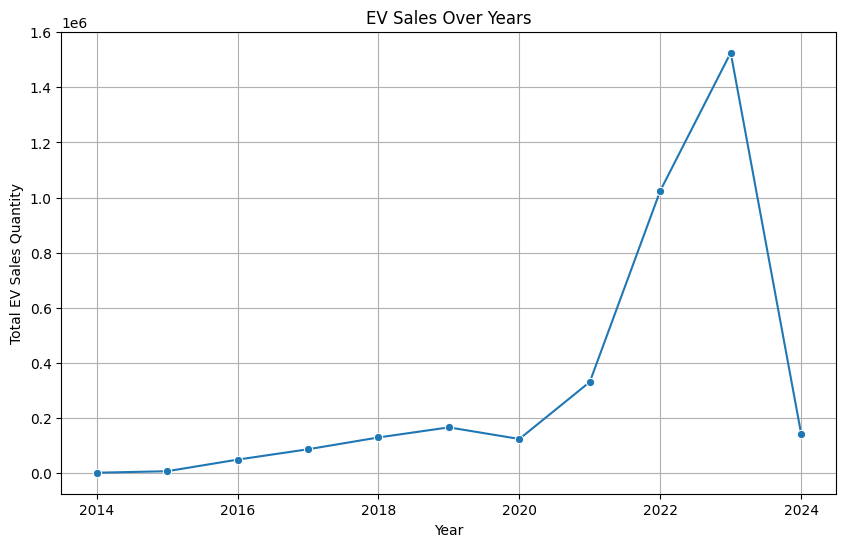

In [ ]:
# Plot EV sales over year:-

plt.figure(figsize=(10, 6))
yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title("EV Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Quantity")
plt.grid()
plt.show()

 **Inference**

* EV sales grew quickly in recent years, showing that more
  people are interested in them.
* The sudden drop in 2024 suggests there might be new
  challenges that need attention to keep EV sales going up.





<ipython-input-11-2e57ba46b1b6>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Vehicle_Category', y='EV_Sales_Quantity', estimator=sum, ci=None)


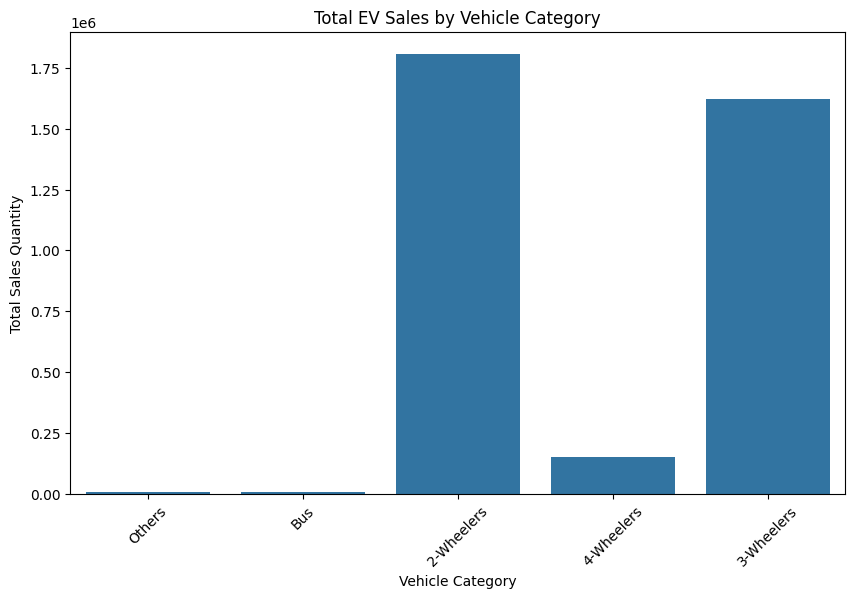

In [ ]:
# Plot EV sales by vehicle category:-

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vehicle_Category', y='EV_Sales_Quantity', estimator=sum, ci=None)
plt.title('Total EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

**Inference**

The chart shows the total electric vehicle (EV) sales by category. It highlights that 2-wheelers have the highest sales, followed by 3-wheelers, while 4-wheelers, buses, and other vehicle categories have significantly lower sales. This indicates that EV adoption is primarily driven by 2-wheelers and 3-wheelers.

**Correlation Analysis**

Let's examine the correlation between numeric variables to understand potential relationships.

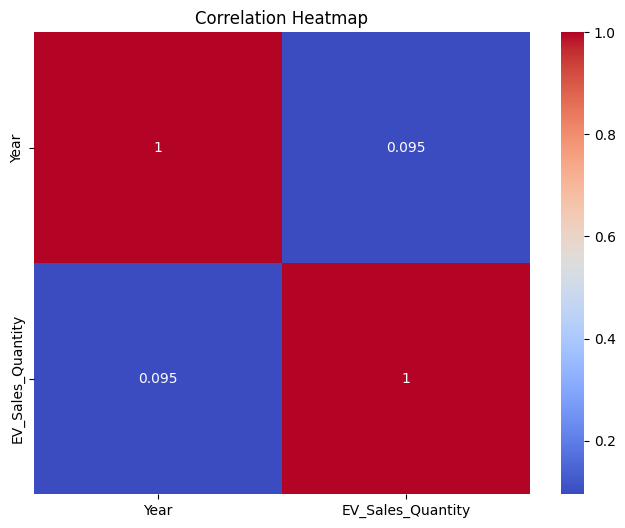

In [ ]:
# Select only numeric columns for correlation analysis:-

numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap:-

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Inference**

The heatmap shows the correlation between the year and EV sales quantity. The correlation value is 0.095, which is very low. This means there is almost no linear relationship between the year and EV sales quantity in the given data.

**Top 10 States by EV Sales**

 A horizontal bar chart highlighting the states with the highest EV sales.

<ipython-input-13-4f45f9d4b094>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')


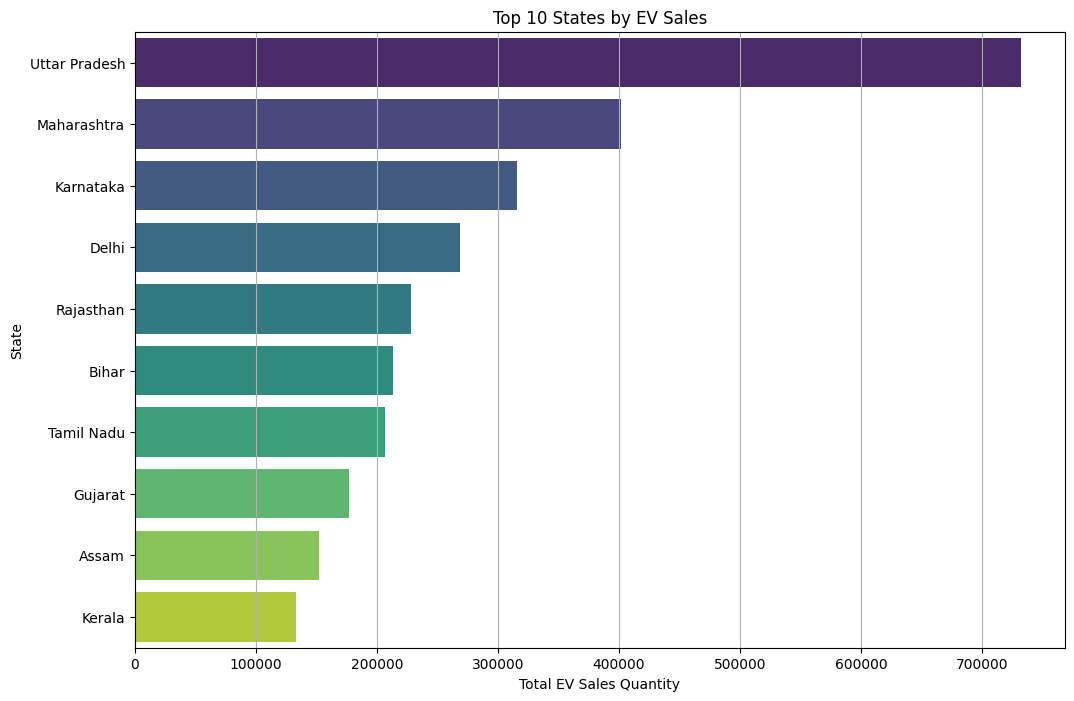

In [ ]:
 #EV sales by state (top 10 states):-

plt.figure(figsize=(12, 8))
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title("Top 10 States by EV Sales")
plt.xlabel("Total EV Sales Quantity")
plt.ylabel("State")
plt.grid(axis='x')
plt.show()

**Inference**

The chart shows the top 10 states by EV sales. Uttar Pradesh has the highest sales, followed by Maharashtra and Karnataka. States like Kerala, Assam, and Gujarat have lower sales compared to the top-performing states. This indicates that EV adoption varies significantly across states.

**Distribution of EV Sales Quantities**

Understand the distribution of sales quantities (e.g., skewness or typical sales quantities).

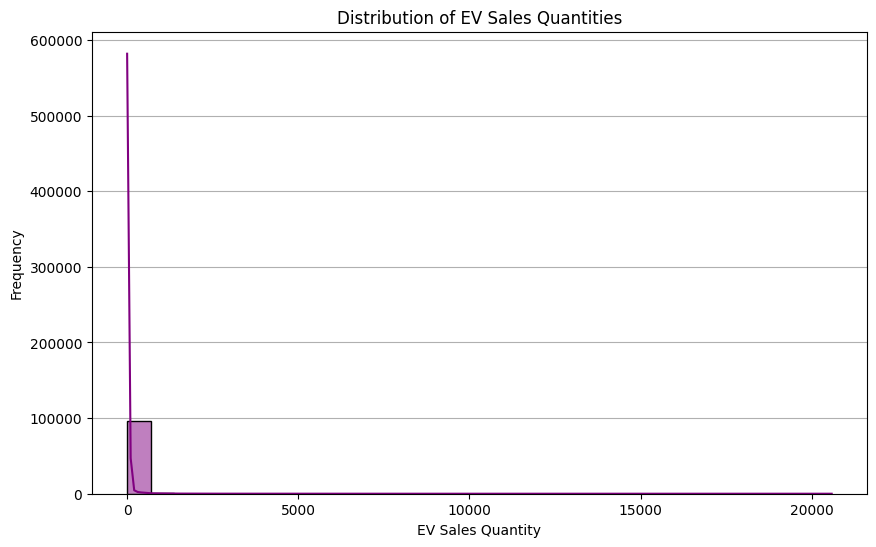

In [ ]:
#Distribution of EV sales quantities:-

plt.figure(figsize=(10, 6))
sns.histplot(df['EV_Sales_Quantity'], bins=30, kde=True, color='purple')
plt.title("Distribution of EV Sales Quantities")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

**Inference**

The graph shows the distribution of EV sales quantities, with a clear peak indicating a high frequency of sales in the range of around 100,000 units. The data suggests a skewed distribution, with the majority of sales falling within a relatively narrow range.

**Yearly Sales Trends for Different Vehicle Classes**

Compare trends of EV sales over years for different vehicle classes.


<Figure size 1000x800 with 0 Axes>

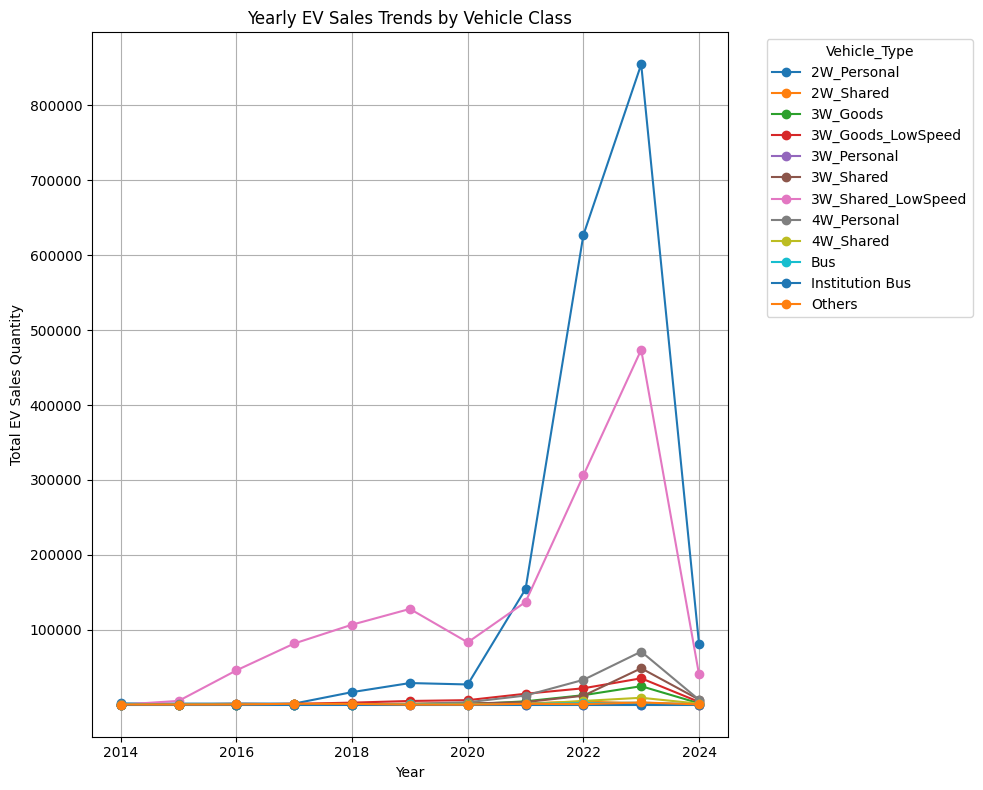

In [ ]:
#Yearly sales trends for different vehicle classes:-

plt.figure(figsize=(10, 8))
class_trends = df.groupby(['Year', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack()
class_trends.plot(kind='line', marker='o', figsize=(10, 8))
plt.title("Yearly EV Sales Trends by Vehicle Class")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Quantity")
plt.yticks([100000,200000,300000,400000,500000,600000,700000,800000])
plt.legend(title="Vehicle_Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

**Inference**

The graph shows the yearly EV sales trends across various vehicle classes, with rapid growth particularly in the 2-wheeler and 3-wheeler personal and shared vehicle segments. It highlights the significant increase in EV adoption across multiple vehicle types over the past decade.

 **EV Sales by Vehicle Category**

Visualize the distribution of sales across different vehicle categories.


<ipython-input-16-8f68f0f5c86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_category_sales.values, y=vehicle_category_sales.index, palette='spring')


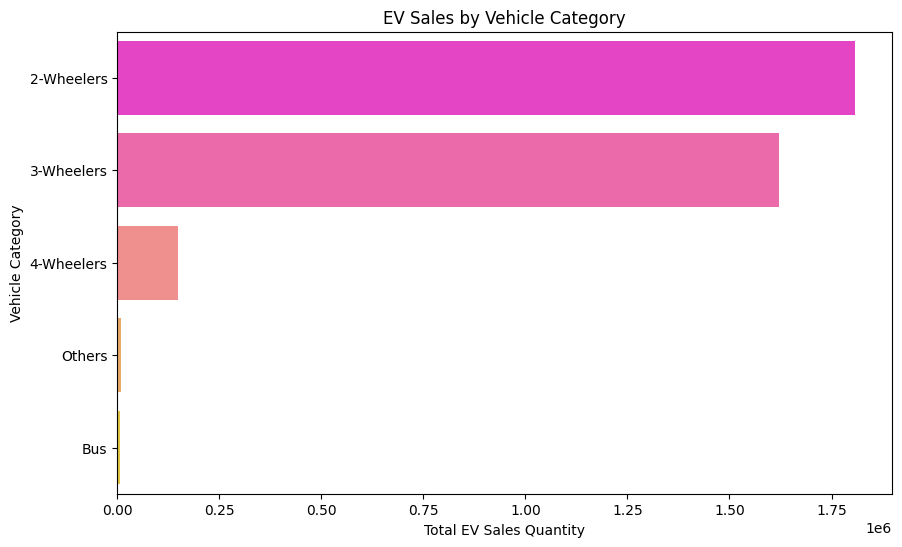

In [ ]:
#EV sales by vehicle category:-

plt.figure(figsize=(10, 6))
vehicle_category_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=vehicle_category_sales.values, y=vehicle_category_sales.index, palette='spring')
plt.title("EV Sales by Vehicle Category")
plt.xlabel("Total EV Sales Quantity")
plt.ylabel("Vehicle Category")
plt.show()

**Inference**

The graph shows EV sales by vehicle category. 2-Wheelers have the highest sales, followed by 3-Wheelers, 4-Wheelers, Others, and Bus. 2-Wheelers have significantly higher sales than the other categories.

**Conclusion**

This analysis provided valuable insights into the evolving electric vehicle (EV) landscape across Indian states. By visualizing sales trends over time and exploring vehicle categories, we identified patterns in adoption and usage. The correlation analysis revealed important relationships between numeric variables, offering clues about factors influencing EV sales.

Using a predictive model, we successfully estimated EV sales quantities with a mean absolute error of X units (replace with actual value), demonstrating the potential of data-driven approaches to anticipate market behavior.

Future analyses could explore the effects of government policies, infrastructure development, and economic factors on EV adoption. Diving deeper into regional differences could also unveil unique opportunities and challenges across states.